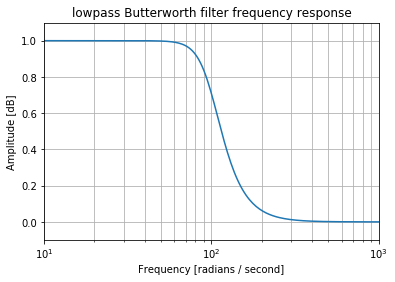

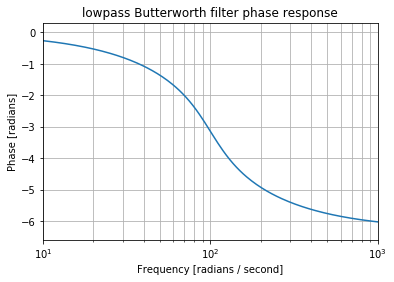

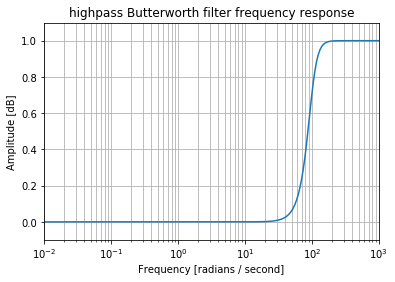

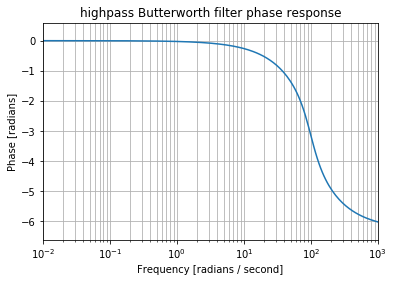

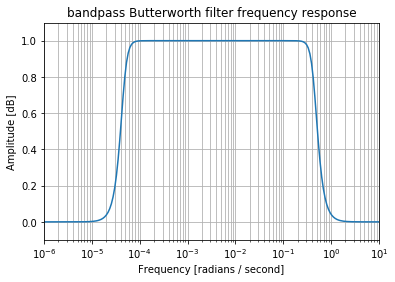

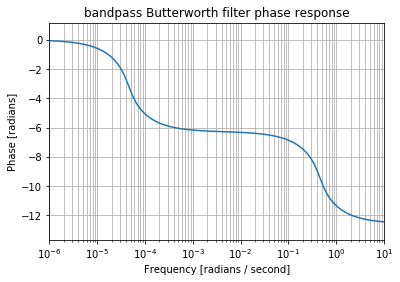

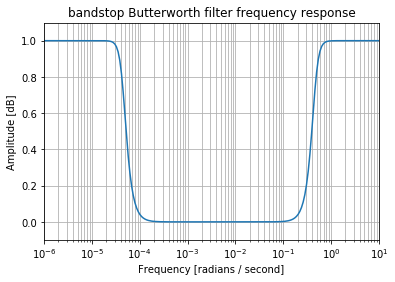

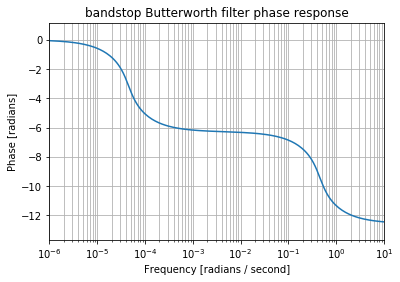

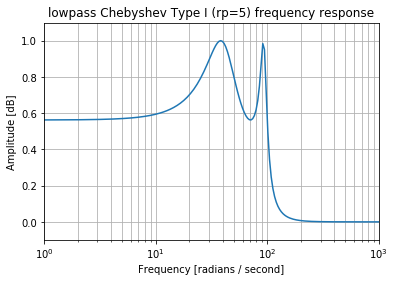

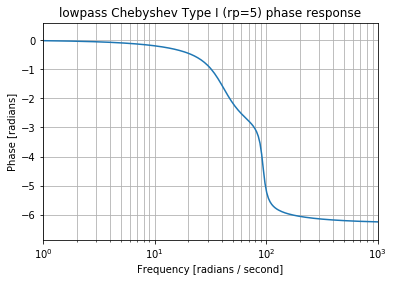

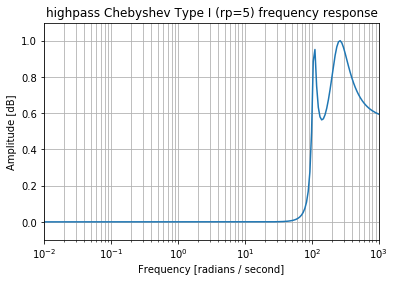

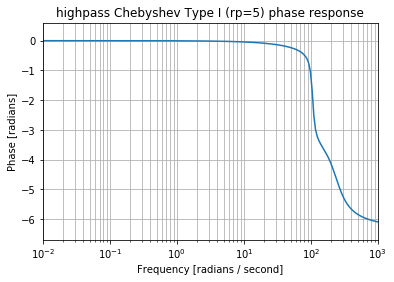

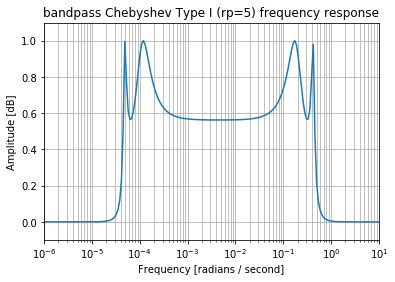

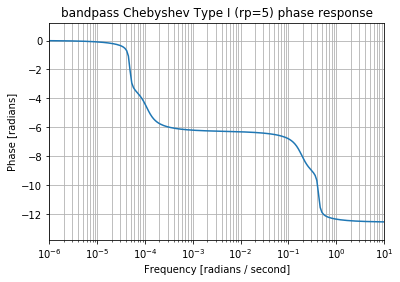

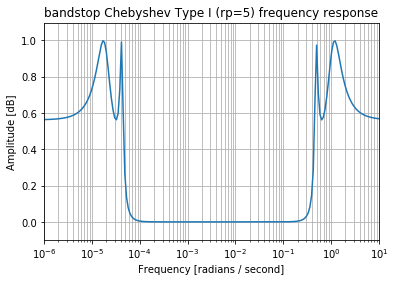

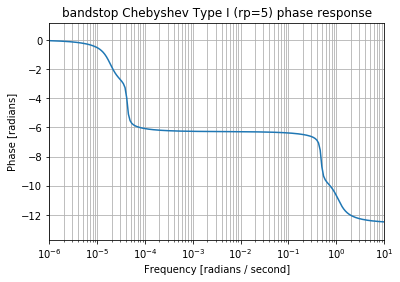

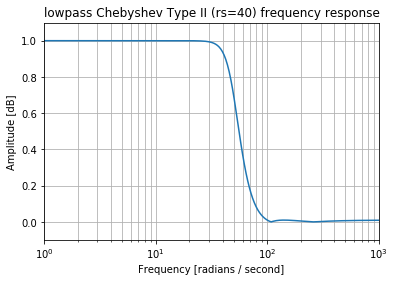

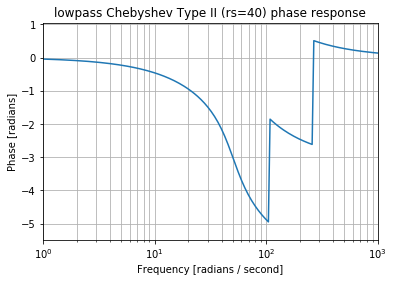

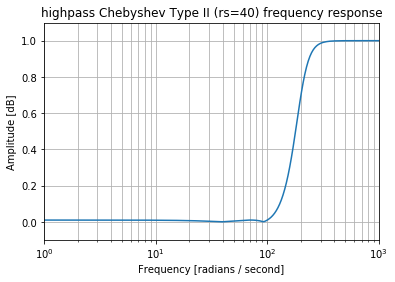

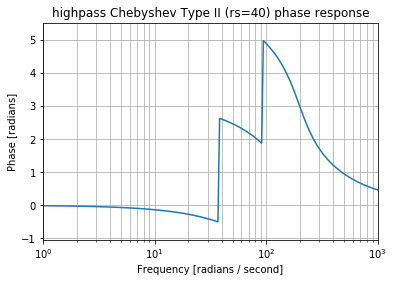

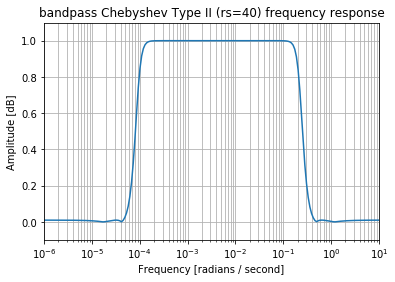

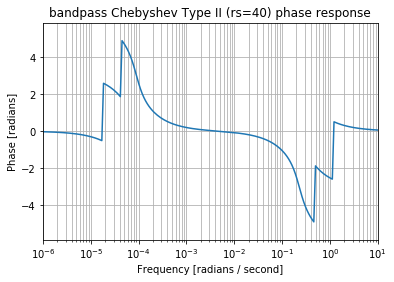

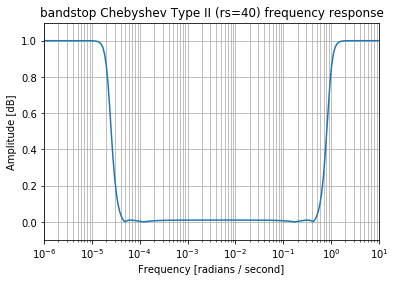

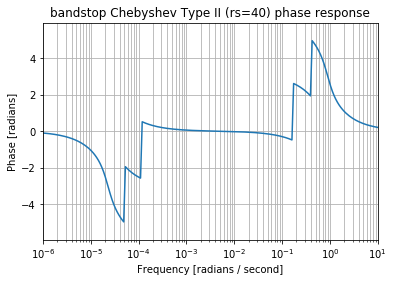

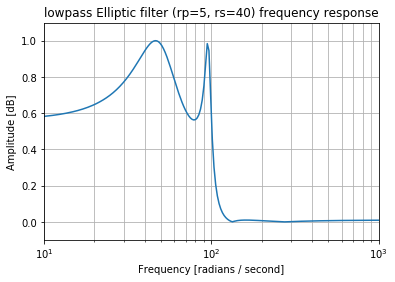

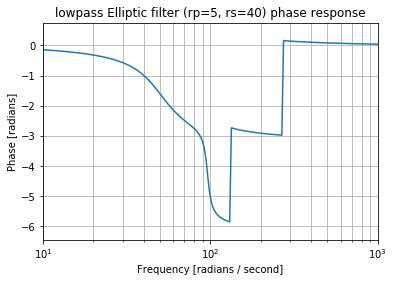

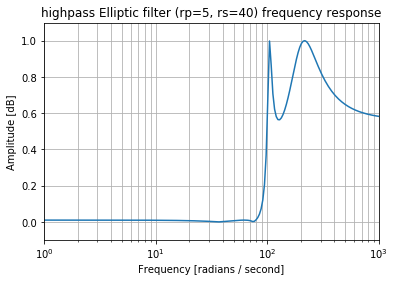

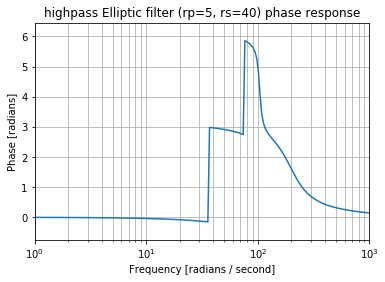

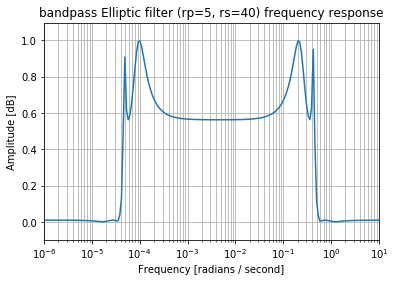

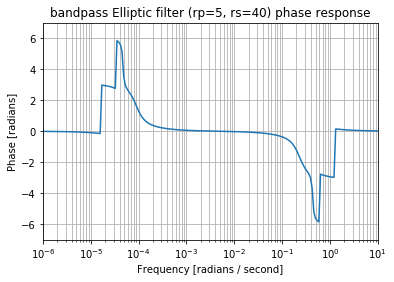

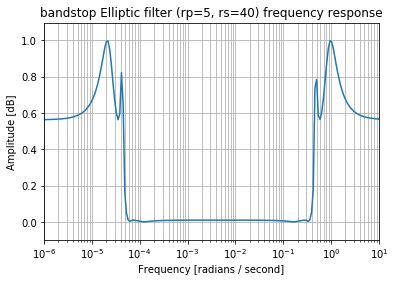

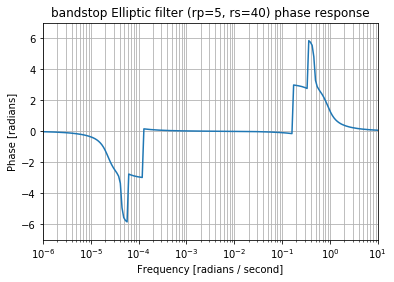

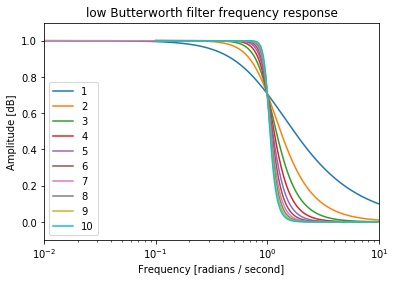

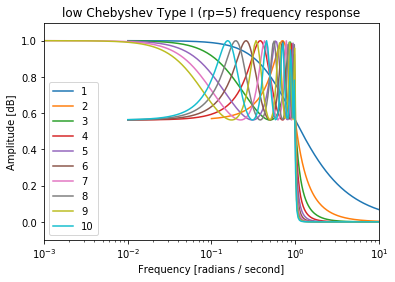

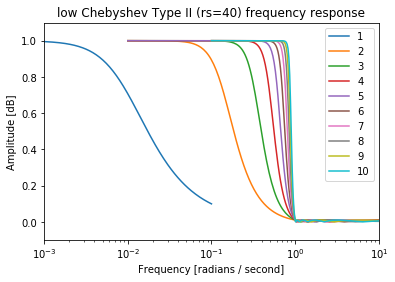

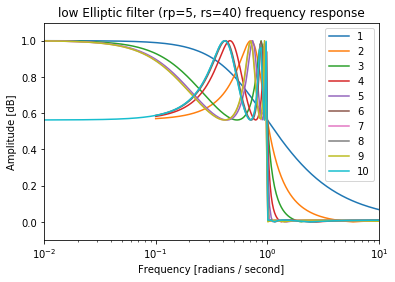

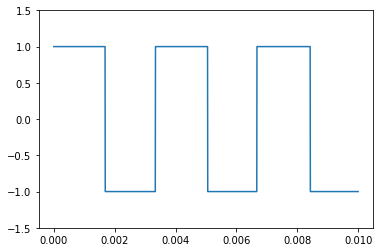

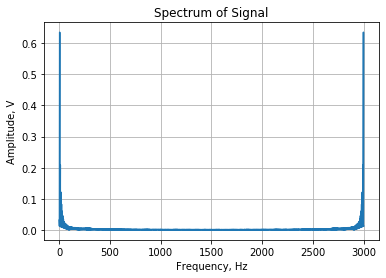

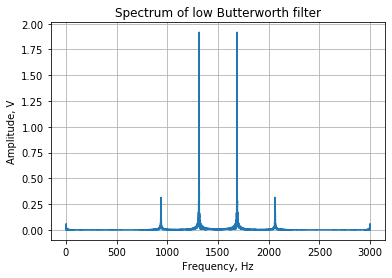

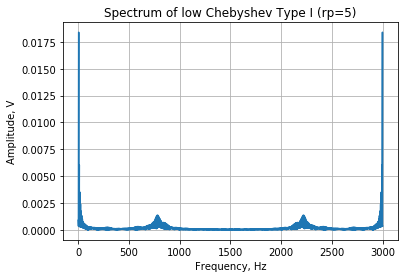

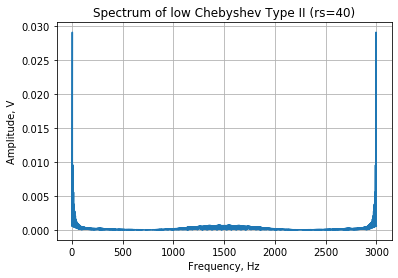

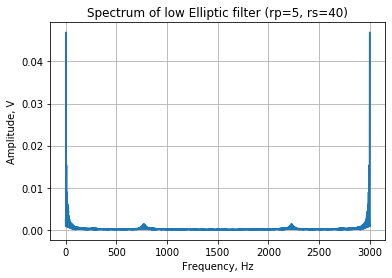

[None, None, None, None]

In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, rfftfreq

Fs = 44100

fc = np.array([1, 10000])
wc = 2 * fc / Fs

t = np.linspace(0, 0.01, 3000, endpoint=False)
n = np.size(t)
fr = rfftfreq(n, 1. / 3000)

Btypes = {
    'lowpass': 'lowpass',
    'highpass': 'highpass',
    'bandpass': 'bandpass',
    'bandstop': 'bandstop'
}


def draw(x, y, title, xlabel, ylabel, show=True):
    plt.semilogx(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    if show:
        plt.show()


def draw_graphs(b, a, title, show=True):
    w, h = signal.freqs(b, a)
    draw_frequency_response(w, h, title, show)
    draw_phase_response(w, h, title, show)


def draw_frequency_response(w, h, title, show=True):
    draw(w, (abs(h)),
         f'{title} frequency response',
         'Frequency [radians / second]',
         'Amplitude [dB]', show)


def draw_phase_response(w, h, title, show=True):
    draw(w, np.unwrap(np.angle(h)),
         f'{title} phase response',
         'Frequency [radians / second]',
         'Phase [radians]', show)


def define_critical_frequency(btype):
    Wn = 1
    if (btype == Btypes['lowpass'] or btype == Btypes['highpass']):
        Wn = 100
    if (btype == Btypes['bandpass'] or btype == Btypes['bandstop']):
        Wn = wc
    return Wn


def define_graphs(b, a, title, show, task):
    if task == 1:
        draw_graphs(b, a, title, show)
    if task == 2:
        w, h = signal.freqs(b, a)
        draw_frequency_response(w, h, title, show=False)
    if task == 3:
        return


def butter(btype="low", N=4, show=True, task=1, illustrate=True):
    Wn = define_critical_frequency(btype)

    b, a = signal.butter(N, Wn, btype, analog=True)
    title = f'{btype} Butterworth filter'
    
    if illustrate:
        define_graphs(b, a, title, show, task)
    return b, a, title


def cheby1(btype="low", N=4, show=True, task=1, illustrate=True):
    Wn = define_critical_frequency(btype)

    b, a = signal.cheby1(N, 5, Wn, btype, analog=True)
    title = f'{btype} Chebyshev Type I (rp=5)'
    
    if illustrate:
        define_graphs(b, a, title, show, task)
    return b, a, title


def cheby2(btype="low", N=4, show=True, task=1, illustrate=True):
    Wn = define_critical_frequency(btype)

    b, a = signal.cheby2(N, 40, Wn, btype, analog=True)
    title = f'{btype} Chebyshev Type II (rs=40)'
    
    if illustrate:
        define_graphs(b, a, title, show, task)
    return b, a, title


def ellip(btype="low", N=4, show=True, task=1, illustrate=True):
    Wn = define_critical_frequency(btype)

    b, a = signal.ellip(N, 5, 40, Wn, btype, analog=True)
    title = f'{btype} Elliptic filter (rp=5, rs=40)'
    
    if illustrate:
        define_graphs(b, a, title, show, task)
    return b, a, title


def draw_group(f):
    order = range(1, 11)
    list(map(lambda i: f(N=i, task=2), order))
    plt.legend(order)
    plt.show()


def draw_spectrum_graph(signal, signal_title='Signal'):
    spectrum = abs(fft(signal)) / n

    plt.title(f"Spectrum of {signal_title}")
    plt.plot(2 * fr, spectrum)
    plt.ylabel('Amplitude, V')
    plt.xlabel('Frequency, Hz')
    plt.grid(True)
    plt.show()


def create_signal():
    sig = np.sin(2 * np.pi * t)
    pwm = signal.square(2 * np.pi * 300 * t, duty=(sig + 1) / 2)
    plt.plot(t, pwm)
    plt.ylim(-1.5, 1.5)
    plt.show()
    draw_spectrum_graph(pwm)
    return pwm


def filtrate(f):
    b, a, title = f(illustrate=False)
    filtered_signal = signal.lfilter(b, a, pwm)
    draw_spectrum_graph(filtered_signal, signal_title=title)


filters = [butter, cheby1, cheby2, ellip]

list(map(lambda f: list(map(f, list(Btypes))), filters))

list(map(draw_group, filters))

pwm = create_signal()

list(map(filtrate, filters))